In [1]:
import pandas as pd
import numpy as np

combined = pd.read_csv('Input Data/clean_data.csv')
combined.head()

C:\Users\Adam\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,date_time,date_x,time,loc_t ype,zip_code,council_district,apd_sector,apd_district,latitude,longtitude,...,zip78749,zip78750,zip78751,zip78752,zip78753,zip78754,zip78756,zip78757,zip78758,zip78759
0,2014-10-01 20:19:00,10/01/2014,2019.0,RESIDENCE / HOME,78723.0,1.0,ID,1,30.315506,-97.690678,...,0,0,0,0,0,0,0,0,0,0
1,2014-10-05 16:33:00,10/05/2014,1633.0,RESIDENCE / HOME,78723.0,1.0,ID,1,30.315506,-97.690678,...,0,0,0,0,0,0,0,0,0,0
2,2012-01-20 22:30:00,01/20/2012,2230.0,PARKING LOTS / GARAGE,78723.0,1.0,ID,1,30.320667,-97.687671,...,0,0,0,0,0,0,0,0,0,0
3,2011-01-01 20:00:00,01/01/2011,2000.0,RESIDENCE / HOME,78723.0,1.0,ID,1,30.320667,-97.687671,...,0,0,0,0,0,0,0,0,0,0
4,2012-03-06 05:00:00,03/06/2012,500.0,RESIDENCE / HOME,78723.0,1.0,ID,1,30.320667,-97.687671,...,0,0,0,0,0,0,0,0,0,0


In [2]:
dropped_columns = ['date_time', 'date_x', 'time', 'loc_t ype', 'zip_code', 'council_district', 'apd_sector', 'apd_district']
dropped_columns += ['latitude', 'longtitude', 'location', 'year']
combined = combined.drop(dropped_columns, axis = 1)
len(combined.columns)

183

In [3]:
from sklearn.model_selection import train_test_split

#drop rows that are not complete
combined = combined.dropna(subset= combined.columns)

cols_to_use = ["temp_max", "temp_min", "prec_avg", 'new_year', 'mlk_day', 'wash_bday', 'mem_day', 'ind_day', 
      'labor_day', 'col_day', 'vet_day', 'thanksgiving', 'christmas', 'P0030001','P0030002_pct', 'P0030003_pct', 'P0030004_pct', 'P0030005_pct', 'P0030006_pct', 
      'P0040003_pct', 'P0130001', 'B19113_001E', 'B17001_001E_pct', 'C18120_003E_pct']

Y, X = combined.Target1, combined[cols_to_use]
#Y, X = combined.Target1, combined.drop(['Target1', 'Target2'], axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 3, stratify = Y)


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

# Logistic Regression
clf = LogisticRegression().fit(X_train, Y_train)

fpr, tpr, threshold = metrics.roc_curve(Y_test, clf.predict_proba(X_test)[:,1])
logAUC = metrics.roc_auc_score(Y_test, clf.predict_proba(X_test)[:,1])

print('The logistic regression accuracy is: ' + str(clf.score(X_test, Y_test)))
print('The logistic regression AUC is: ' + str(auc(fpr, tpr)))

The logistic regression accuracy is: 0.9871260629467764
The logistic regression AUC is: 0.615703465686215


In [5]:
print(Y_train.value_counts()/len(Y_train))
print(Y_test.value_counts()/len(Y_test))

0.0    0.987127
1.0    0.012873
Name: Target1, dtype: float64
0.0    0.987126
1.0    0.012874
Name: Target1, dtype: float64


In [6]:
from sklearn.model_selection import StratifiedKFold

# Set up stratified k fold split
skf = StratifiedKFold(n_splits=5, random_state=400)
skf.get_n_splits(X_train, Y_train)

5

In [7]:
#obtain AUC for each of the k folds
auc_lr = []
for train_index, test_index in skf.split(X_train, Y_train):
    
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    Y_train_fold, Y_test_fold = Y_train.iloc[train_index], Y_train.iloc[test_index]
    
    model = LogisticRegression(C=1e30).fit(X_train_fold, Y_train_fold)
    
    Y_pred_fold = model.predict_proba(X_test_fold)[:,1]
    fpr, tpr, thresholds = roc_curve(Y_test_fold, Y_pred_fold)
    auc_lr.append(auc(fpr, tpr))
    
print(auc_lr)

[0.6177891044444068, 0.6046811648508958, 0.6067359443673445, 0.6193984548834625, 0.6170971558673367]


In [8]:
#from sklearn.svm import SVC
#clfsvm = SVC(gamma='auto').fit(X_train, Y_train)

#Y_pred2 = clfsvm.predict_proba(X_test)[:,1]
#fpr2, tpr2, thresholds2 = roc_curve(Y_test, Y_pred2)
#print(auc(fpr2, tpr2))




In [ ]:
auc_knn = {}

In [12]:
from sklearn.neighbors import KNeighborsClassifier

#obtain AUC for each of the k folds and loop for various options of neighbors

neighbors = [1,3,5,7,10]

for i in neighbors:
    auc_knn[i]=[]

print(auc_knn)

for train_index, test_index in skf.split(X_train, Y_train):
    
    X_train_fold_knn, X_test_fold_knn = X_train.iloc[train_index], X_train.iloc[test_index]
    Y_train_fold_knn, Y_test_fold_knn = Y_train.iloc[train_index], Y_train.iloc[test_index]
    
    for i in neighbors:
        clfKNN = KNeighborsClassifier(n_neighbors=i).fit(X_train_fold_knn, Y_train_fold_knn)
    
        Y_pred_fold_knn = clfKNN.predict_proba(X_test_fold_knn)[:,1]
        fpr3, tpr3, thresholds3 = roc_curve(Y_test_fold_knn, Y_pred_fold_knn)
        auc_knn[i].append(auc(fpr3, tpr3))
    
print(auc_knn)

{1: [], 3: [], 5: [], 7: [], 10: []}
{1: [0.5213925920901489, 0.5229729780791457, 0.5243612643322072, 0.5175177032747159, 0.5214698305541625], 3: [0.5503502974285832, 0.5484527536635518, 0.559038976269573, 0.5412091245161387, 0.5539520285603073], 5: [0.5645994062625798, 0.5687035385918955, 0.5778778716542593, 0.5625327746686579, 0.5699332323427759], 7: [0.577148846460846, 0.5812508807058218, 0.5901488156006593, 0.5755836851685374, 0.5798588248279979], 10: [0.5947110536679202, 0.5965630803788006, 0.6011557474258002, 0.5865388989697395, 0.5964274392221002]}


In [14]:
#add additional 'k' values for KNN testing
neighbors2 = [15,20,30,50,100]

for i in neighbors2:
    auc_knn[i]=[]

print(auc_knn)

for train_index, test_index in skf.split(X_train, Y_train):
    
    X_train_fold_knn, X_test_fold_knn = X_train.iloc[train_index], X_train.iloc[test_index]
    Y_train_fold_knn, Y_test_fold_knn = Y_train.iloc[train_index], Y_train.iloc[test_index]
    
    for i in neighbors2:
        clfKNN = KNeighborsClassifier(n_neighbors=i).fit(X_train_fold_knn, Y_train_fold_knn)
    
        Y_pred_fold_knn = clfKNN.predict_proba(X_test_fold_knn)[:,1]
        fpr4, tpr4, thresholds4 = roc_curve(Y_test_fold_knn, Y_pred_fold_knn)
        auc_knn[i].append(auc(fpr4, tpr4))

{1: [], 3: [], 5: [], 7: [], 10: [], 15: [], 20: [], 30: [], 50: [], 100: []}


In [15]:
print(auc_knn)

{1: [], 3: [], 5: [], 7: [], 10: [], 15: [0.607947827447922, 0.6106968089741354, 0.6188605543142269, 0.6010286534239957, 0.6135044755819367], 20: [0.616607256559778, 0.6165195675783952, 0.6249234720126909, 0.6080781721697467, 0.6190319606124667], 30: [0.6263081908659667, 0.6278771374713012, 0.635807542030719, 0.6211081636181502, 0.6271892559628576], 50: [0.6370737337742769, 0.6398225626601745, 0.6451853985821345, 0.6301932297695276, 0.6439411418223611], 100: [0.6554786019243787, 0.6541364817082297, 0.6609480961108576, 0.6509139498597567, 0.6574196991242995]}


In [16]:
#add additional 'k' values for KNN testing
neighbors3 = [150,200,500]

for i in neighbors3:
    auc_knn[i]=[]

print(auc_knn)

for train_index, test_index in skf.split(X_train, Y_train):
    
    X_train_fold_knn, X_test_fold_knn = X_train.iloc[train_index], X_train.iloc[test_index]
    Y_train_fold_knn, Y_test_fold_knn = Y_train.iloc[train_index], Y_train.iloc[test_index]
    
    for i in neighbors3:
        clfKNN = KNeighborsClassifier(n_neighbors=i).fit(X_train_fold_knn, Y_train_fold_knn)
    
        Y_pred_fold_knn = clfKNN.predict_proba(X_test_fold_knn)[:,1]
        fpr5, tpr5, thresholds5 = roc_curve(Y_test_fold_knn, Y_pred_fold_knn)
        auc_knn[i].append(auc(fpr5, tpr5))

{1: [], 3: [], 5: [], 7: [], 10: [], 15: [0.607947827447922, 0.6106968089741354, 0.6188605543142269, 0.6010286534239957, 0.6135044755819367], 20: [0.616607256559778, 0.6165195675783952, 0.6249234720126909, 0.6080781721697467, 0.6190319606124667], 30: [0.6263081908659667, 0.6278771374713012, 0.635807542030719, 0.6211081636181502, 0.6271892559628576], 50: [0.6370737337742769, 0.6398225626601745, 0.6451853985821345, 0.6301932297695276, 0.6439411418223611], 100: [0.6554786019243787, 0.6541364817082297, 0.6609480961108576, 0.6509139498597567, 0.6574196991242995], 150: [], 200: [], 500: []}


In [17]:
print(auc_knn)

{1: [], 3: [], 5: [], 7: [], 10: [], 15: [0.607947827447922, 0.6106968089741354, 0.6188605543142269, 0.6010286534239957, 0.6135044755819367], 20: [0.616607256559778, 0.6165195675783952, 0.6249234720126909, 0.6080781721697467, 0.6190319606124667], 30: [0.6263081908659667, 0.6278771374713012, 0.635807542030719, 0.6211081636181502, 0.6271892559628576], 50: [0.6370737337742769, 0.6398225626601745, 0.6451853985821345, 0.6301932297695276, 0.6439411418223611], 100: [0.6554786019243787, 0.6541364817082297, 0.6609480961108576, 0.6509139498597567, 0.6574196991242995], 150: [0.6654292183470296, 0.6621543736530788, 0.6675421952834797, 0.6608569102433961, 0.6642380514218087], 200: [0.6641968666779348, 0.6648386688054897, 0.6729674066345882, 0.6663947233175145, 0.6662646539771314], 500: [0.6734631548050665, 0.6712387591639486, 0.6715517310301253, 0.6768034785593302, 0.6807129216351234]}


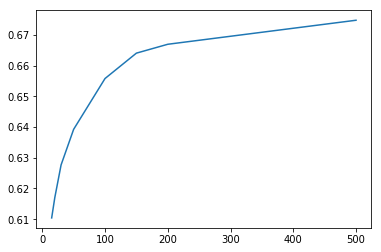

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

keys = list(auc_knn.keys())
keys = [i for i in keys if len(auc_knn[i]) > 0]

auc_knn_averages = [sum(auc_knn[i])/len(auc_knn[i]) for i in auc_knn if len(auc_knn[i]) != 0]
plt.plot(keys, auc_knn_averages)